#automação de processos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

vendas = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/base_dados.xlsx')
display(vendas)

,Data,Loja,Produto,Quantidade
0,2017-05-27 00:00:00,Avenida 44,Short,2
1,2019-11-04 00:00:00,Avenida 44,Relógio,5
2,2019-06-18 00:00:00,Shopping Flamboyant,Calça,2
3,2020-04-18 00:00:00,Shopping Bougainville,Meia,1
4,2018-06-12 00:00:00,Avenida 85,Camisa,2
...,...,...,...,...
1048570,2010-05-29 00:00:00,Avenida 44,Chinelo,6
1048571,2015-02-18 00:00:00,Avenida 85,Calcinha,6
1048572,2014-01-05 00:00:00,Avenida 44,Camiseta,2
1048573,2019-08-02 00:00:00,Avenida Anhanguera,Meia,4


In [ ]:
produtos = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/base_dados.xlsx',
                         sheet_name = 'Produtos') #sheet name escolhe a planilha
produtos

,Produto,Valor Unitário (US$),Custo Unitário (US$)
0,Short,12,3.26
1,Relógio,45,11.99
2,Calça,30,7.46
3,Meia,5,1.53
4,Camisa,25,8.78
5,Tênis,35,9.89
6,Chinelo,8,2.58
7,Camiseta,30,7.27
8,Sapato,40,18.39
9,Bermuda,15,3.91


In [ ]:
email = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/base_dados.xlsx',
                         sheet_name = 'E-mails') #sheet name escolhe a planilha
email

,Loja,E-mail
0,Avenida 44,ff.python1@gmail.com
1,Avenida 85,ff.python2@gmail.com
2,Avenida Anhanguera,ff.python5@gmail.com
3,Goiânia Shopping,ff.python6@gmail.com
4,Shopping Passeio das Águas,ff.python7@gmail.com
5,Shopping Flamboyant,ff.python8@gmail.com
6,Shopping Bougainville,ff.python9@gmail.com


In [ ]:
vendas.info() #analise de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Data        1048572 non-null  object
 1   Loja        1048573 non-null  object
 2   Produto     1048562 non-null  object
 3   Quantidade  1048575 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


In [ ]:
vendas.describe() #analise de dados

,Quantidade
count,1.048575e+06
mean,2.868375e+00
std,1.597391e+00
min,1.000000e+00
25%,1.000000e+00
50%,3.000000e+00
75%,4.000000e+00
max,7.000000e+00


In [ ]:
# precisa remover valores nulos e alterar o tipo da data
vendas['Data'] = pd.to_datetime(vendas['Data'],errors = 'coerce') #coerce substitui numero errado por nulo
vendas = vendas.dropna()     #remove linhas vazias para melhorar os dados
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048513 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Data        1048513 non-null  datetime64[ns]
 1   Loja        1048513 non-null  object        
 2   Produto     1048513 non-null  object        
 3   Quantidade  1048513 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 40.0+ MB


In [ ]:
produtos['Lucro'] = produtos['Valor Unitário (US$)']-\
    produtos['Custo Unitário (US$)']     #criando coluna chamada lucro
produtos

,Produto,Valor Unitário (US$),Custo Unitário (US$),Lucro
0,Short,12,3.26,8.74
1,Relógio,45,11.99,33.01
2,Calça,30,7.46,22.54
3,Meia,5,1.53,3.47
4,Camisa,25,8.78,16.22
5,Tênis,35,9.89,25.11
6,Chinelo,8,2.58,5.42
7,Camiseta,30,7.27,22.73
8,Sapato,40,18.39,21.61
9,Bermuda,15,3.91,11.09


In [ ]:
venda = vendas.merge(produtos) #mesclar informações
venda

,Data,Loja,Produto,Quantidade,Valor Unitário (US$),Custo Unitário (US$),Lucro
0,2017-05-27,Avenida 44,Short,2,12,3.26,8.74
1,2015-06-07,Avenida Anhanguera,Short,1,12,3.26,8.74
2,2018-03-23,Shopping Passeio das Águas,Short,5,12,3.26,8.74
3,2016-03-18,Avenida 44,Short,2,12,3.26,8.74
4,2013-09-02,Avenida 44,Short,5,12,3.26,8.74
...,...,...,...,...,...,...,...
1048508,2013-12-22,Shopping Flamboyant,Cueca,3,5,1.69,3.31
1048509,2017-07-16,Goiânia Shopping,Cueca,1,5,1.69,3.31
1048510,2017-10-26,Avenida 44,Cueca,5,5,1.69,3.31
1048511,2019-01-21,Avenida Anhanguera,Cueca,4,5,1.69,3.31


In [ ]:
venda['Valor Unitário (US$)'] = venda['Valor Unitário (US$)'] * \
    venda['Quantidade']
venda['Custo Unitário (US$)'] = venda['Custo Unitário (US$)'] * \
    venda['Quantidade']
venda['Lucro'] = venda['Lucro'] * venda['Quantidade']
venda = venda.rename(columns={'Valor Unitário (US$)':'Valor Total',
                                'Custo Unitário (US$)': 'Custo Total'})
venda

,Data,Loja,Produto,Quantidade,Valor Total,Custo Total,Lucro
0,2017-05-27,Avenida 44,Short,2,24,6.52,17.48
1,2015-06-07,Avenida Anhanguera,Short,1,12,3.26,8.74
2,2018-03-23,Shopping Passeio das Águas,Short,5,60,16.30,43.70
3,2016-03-18,Avenida 44,Short,2,24,6.52,17.48
4,2013-09-02,Avenida 44,Short,5,60,16.30,43.70
...,...,...,...,...,...,...,...
1048508,2013-12-22,Shopping Flamboyant,Cueca,3,15,5.07,9.93
1048509,2017-07-16,Goiânia Shopping,Cueca,1,5,1.69,3.31
1048510,2017-10-26,Avenida 44,Cueca,5,25,8.45,16.55
1048511,2019-01-21,Avenida Anhanguera,Cueca,4,20,6.76,13.24


In [ ]:
import requests as r
from bs4 import BeautifulSoup

link = 'https://br.investing.com/currencies/usd-brl'
pagina = r.get(link)
sopa = BeautifulSoup(pagina.content,'html.parser')  # html.parser converter para html
resposta = sopa.find('span',class_='text-2xl')
dolar = float(resposta.getText().replace(',','.'))
dolar

5.0623

In [ ]:
venda[['Valor Total','Custo Total','Lucro']] = \
    venda[['Valor Total','Custo Total','Lucro']]*dolar

In [ ]:
venda

,Data,Loja,Produto,Quantidade,Valor Total,Custo Total,Lucro
0,2017-05-27,Avenida 44,Short,2,121.4952,33.006196,88.489004
1,2015-06-07,Avenida Anhanguera,Short,1,60.7476,16.503098,44.244502
2,2018-03-23,Shopping Passeio das Águas,Short,5,303.7380,82.515490,221.222510
3,2016-03-18,Avenida 44,Short,2,121.4952,33.006196,88.489004
4,2013-09-02,Avenida 44,Short,5,303.7380,82.515490,221.222510
...,...,...,...,...,...,...,...
1048508,2013-12-22,Shopping Flamboyant,Cueca,3,75.9345,25.665861,50.268639
1048509,2017-07-16,Goiânia Shopping,Cueca,1,25.3115,8.555287,16.756213
1048510,2017-10-26,Avenida 44,Cueca,5,126.5575,42.776435,83.781065
1048511,2019-01-21,Avenida Anhanguera,Cueca,4,101.2460,34.221148,67.024852


In [ ]:
venda_por_loja = venda.groupby('Loja').sum() #Agrupar e somar... média: mean()
venda_por_loja

,Quantidade,Valor Total,Custo Total,Lucro
Loja,,,,
Avenida 44,684989,8.004030e+07,2.362735e+07,5.641295e+07
Avenida 85,237822,2.596671e+07,7.811008e+06,1.815571e+07
Avenida Anhanguera,413549,4.731621e+07,1.421890e+07,3.309732e+07
Goiânia Shopping,463001,4.860092e+07,1.474285e+07,3.385807e+07
Shopping Bougainville,146685,1.581793e+07,4.757712e+06,1.106022e+07
Shopping Flamboyant,576562,6.582883e+07,2.019382e+07,4.563502e+07
Shopping Passeio das Águas,484902,5.177291e+07,1.575624e+07,3.601667e+07


In [ ]:
# venda['Ticket Médio'] = venda['Lucro']/venda['Quantidade']
# venda = venda.drop('Ticker Médio',axis=1)
venda_por_loja['Ticket Médio'] = venda_por_loja['Lucro']/venda_por_loja['Quantidade']
venda_por_loja

,Quantidade,Valor Total,Custo Total,Lucro,Ticket Médio
Loja,,,,,
Avenida 44,684989,8.004030e+07,2.362735e+07,5.641295e+07,82.355996
Avenida 85,237822,2.596671e+07,7.811008e+06,1.815571e+07,76.341573
Avenida Anhanguera,413549,4.731621e+07,1.421890e+07,3.309732e+07,80.032400
Goiânia Shopping,463001,4.860092e+07,1.474285e+07,3.385807e+07,73.127423
Shopping Bougainville,146685,1.581793e+07,4.757712e+06,1.106022e+07,75.401155
Shopping Flamboyant,576562,6.582883e+07,2.019382e+07,4.563502e+07,79.150232
Shopping Passeio das Águas,484902,5.177291e+07,1.575624e+07,3.601667e+07,74.276193


In [ ]:
prod = []
for loja in venda_por_loja.index:
    venda_44 = venda.loc[venda['Loja']==loja]
    venda_44 = venda_44.groupby('Produto').sum()
    venda_44 = venda_44.loc[venda_44['Quantidade']==venda_44['Quantidade'].max()]
    prod.append(venda_44.index[0])  # olhando pra loja especifica, filtrando os produtos e vendo qual vendeu a quantidade maxima
    #prod #lista com o produto mais vendido
venda_por_loja['Produto mais vendido'] = prod
venda_por_loja

,Quantidade,Valor Total,Custo Total,Lucro,Ticket Médio,Produto mais vendido
Loja,,,,,,
Avenida 44,684989,8.004030e+07,2.362735e+07,5.641295e+07,82.355996,Camiseta
Avenida 85,237822,2.596671e+07,7.811008e+06,1.815571e+07,76.341573,Camisa
Avenida Anhanguera,413549,4.731621e+07,1.421890e+07,3.309732e+07,80.032400,Camisa
Goiânia Shopping,463001,4.860092e+07,1.474285e+07,3.385807e+07,73.127423,Camisa
Shopping Bougainville,146685,1.581793e+07,4.757712e+06,1.106022e+07,75.401155,Camisa
Shopping Flamboyant,576562,6.582883e+07,2.019382e+07,4.563502e+07,79.150232,Camisa
Shopping Passeio das Águas,484902,5.177291e+07,1.575624e+07,3.601667e+07,74.276193,Camisa


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Quantidade,Valor Total,Custo Total,Lucro,Ticket Médio,Produto mais vendido,gráficos
Loja,,,,,,,
Avenida 44,684989,8.004030e+07,2.362735e+07,5.641295e+07,82.355996,Camiseta,Figure(720x432)
Avenida 85,237822,2.596671e+07,7.811008e+06,1.815571e+07,76.341573,Camisa,Figure(720x432)
Avenida Anhanguera,413549,4.731621e+07,1.421890e+07,3.309732e+07,80.032400,Camisa,Figure(720x432)
Goiânia Shopping,463001,4.860092e+07,1.474285e+07,3.385807e+07,73.127423,Camisa,Figure(720x432)
Shopping Bougainville,146685,1.581793e+07,4.757712e+06,1.106022e+07,75.401155,Camisa,Figure(720x432)
Shopping Flamboyant,576562,6.582883e+07,2.019382e+07,4.563502e+07,79.150232,Camisa,Figure(720x432)
Shopping Passeio das Águas,484902,5.177291e+07,1.575624e+07,3.601667e+07,74.276193,Camisa,Figure(720x432)


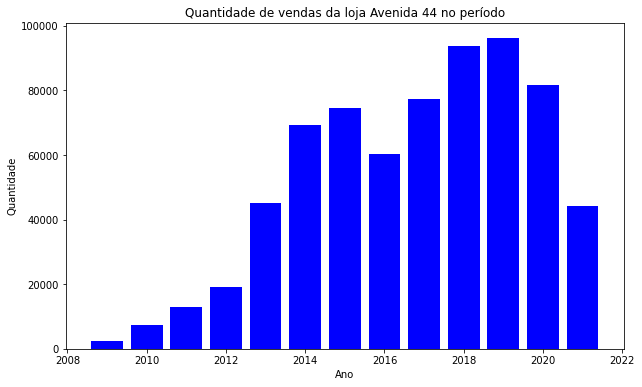

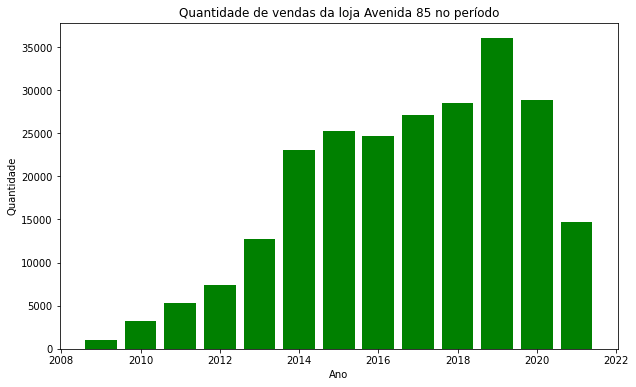

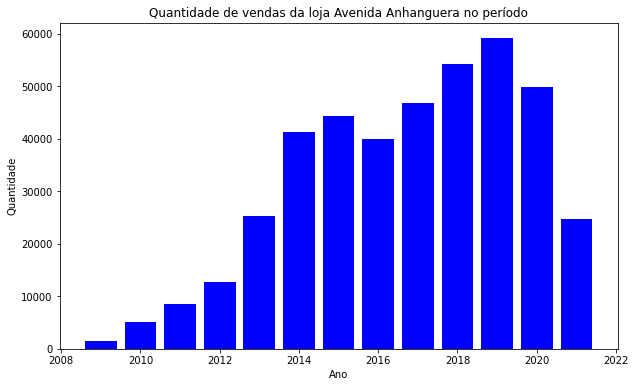

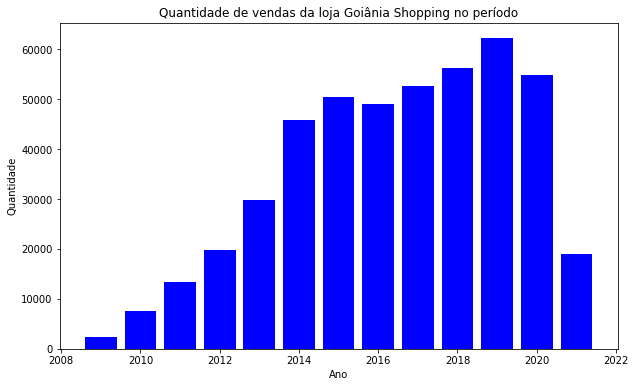

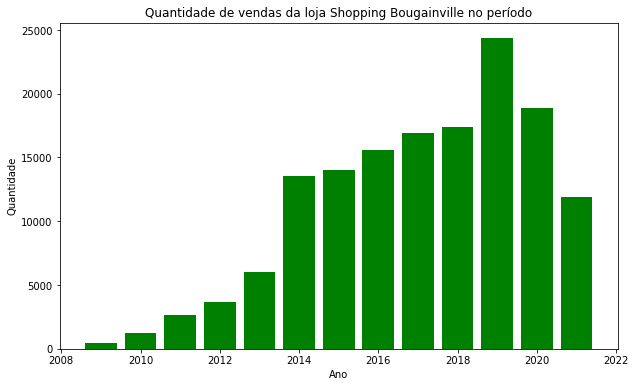

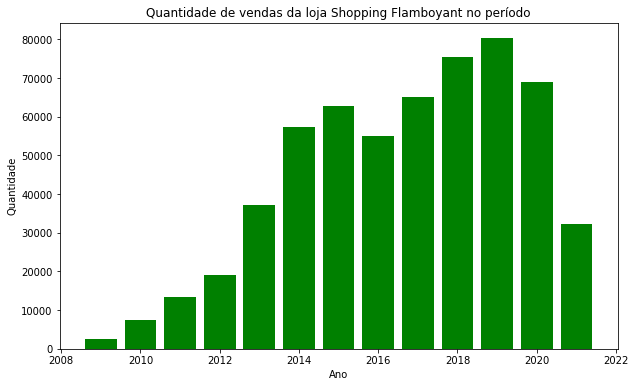

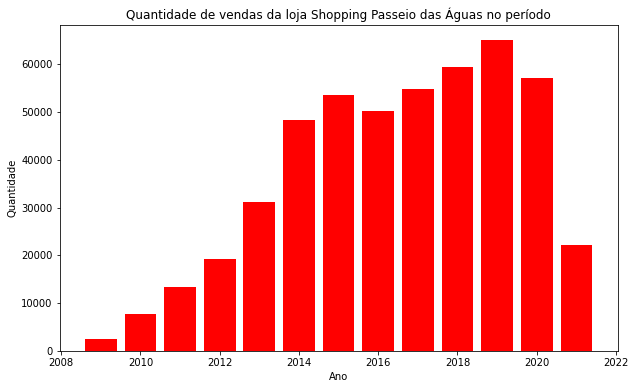

In [ ]:
import matplotlib.pyplot as plt
import random
#Loja -> pegar o ano -> agrupar ano -> grafico
graf = []
lista_cor = ['g','b','r']
for loja in venda_por_loja.index:
    cor = lista_cor[random.randint(0,2)]
    venda_44 = venda.loc[venda['Loja']==loja]
    venda_44['Ano'] = venda_44['Data'].dt.year   # dt.year pega o ano da datatime
    venda_44  = venda_44.groupby('Ano').sum()
    fig = plt.figure(figsize = (10,6))
    plt.bar(x = venda_44.index, height=venda_44['Quantidade'],color = cor)
    plt.title(f'Quantidade de vendas da loja {loja} no período')
    plt.xlabel('Ano')
    plt.ylabel('Quantidade')
    graf.append(fig)
venda_por_loja['gráficos'] = graf
venda_por_loja

In [ ]:
def formata_moeda(num):
    num = f'R$ {num:,.2f}' #que ?
    num = num.replace(',',';')
    num = num.replace('.',',')
    num = num.replace(';','.')
    return num

In [ ]:
# fazer um rank das lojas
ranking = venda_por_loja[['Quantidade','Lucro']]
ranking = ranking.rename(columns={'Lucro':'Faturamento'})
ranking['Faturamento'] = [formata_moeda(valor) for valor in ranking['Faturamento']]
ranking = ranking.sort_values('Quantidade',ascending=False)
ranking


,Quantidade,Faturamento
Loja,,
Avenida 44,684989,"R$ 56.412.951,31"
Shopping Flamboyant,576562,"R$ 45.635.016,08"
Shopping Passeio das Águas,484902,"R$ 36.016.674,74"
Goiânia Shopping,463001,"R$ 33.858.069,87"
Avenida Anhanguera,413549,"R$ 33.097.319,07"
Avenida 85,237822,"R$ 18.155.705,68"
Shopping Bougainville,146685,"R$ 11.060.218,44"


In [ ]:
pip install redmail


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 803 kB/s 


In [ ]:
venda_por_loja

,Quantidade,Valor Total,Custo Total,Lucro,Ticket Médio,Produto mais vendido,gráficos
Loja,,,,,,,
Avenida 44,684989,8.004030e+07,2.362735e+07,5.641295e+07,82.355996,Camiseta,Figure(720x432)
Avenida 85,237822,2.596671e+07,7.811008e+06,1.815571e+07,76.341573,Camisa,Figure(720x432)
Avenida Anhanguera,413549,4.731621e+07,1.421890e+07,3.309732e+07,80.032400,Camisa,Figure(720x432)
Goiânia Shopping,463001,4.860092e+07,1.474285e+07,3.385807e+07,73.127423,Camisa,Figure(720x432)
Shopping Bougainville,146685,1.581793e+07,4.757712e+06,1.106022e+07,75.401155,Camisa,Figure(720x432)
Shopping Flamboyant,576562,6.582883e+07,2.019382e+07,4.563502e+07,79.150232,Camisa,Figure(720x432)
Shopping Passeio das Águas,484902,5.177291e+07,1.575624e+07,3.601667e+07,74.276193,Camisa,Figure(720x432)


In [ ]:
from redmail import EmailSender
from tqdm import tqdm

remetente = 'polipython@gmail.com'
senha = 'jtvujhxejnkeuztd'

email = EmailSender(host='smtp.gmail.com',
                    port=587,
                    username=remetente,
                    password=senha)
conteudo = '''
    <h1>Resultados da loja {{ loja }}</h1>

    <p>Resumo dos resultados para a loja <i>{{ loja }}</i> da companhia:</p>

    <ul>
        <li>Faturamento total de <b>{{ faturamento }}</b></li>
        <li><b>{{ quantidade }}</b> peças vendidas</li>
        <li>Ticket médio de <b>{{ ticket_medio }}</b></li>
        <li><b>{{ produto_mais_vendido }}</b> foi o produto mais vendido</li>
    </ul>

    <p>Segue o ranking de vendas de todas as lojas:</p>

    {{ ranking }}

    <p>E os resultados da loja {{ loja }} ao longo do período:</p>

    {{ grafico }}

    <p>Att.</p>
    '''


In [ ]:

loja = 'Avenida 44'
quantidade = venda_por_loja.loc[venda_por_loja.index==loja]['Quantidade'][0]
faturamento = venda_por_loja.loc[venda_por_loja.index==loja]['Faturamento'][0]
ticket_médio = venda_por_loja.loc[venda_por_loja.index==loja]['Ticket Médio'][0]
produto_mais_vendido = venda_por_loja.loc[venda_por_loja.index==loja]['Produto mais vendido	'][0]
grafico =venda_por_loja.loc[venda_por_loja.index==loja]['gráficos'][0]

assunto = f'SOMOS AGENTE FAZENDO RELATORIO DA LOJA: {loja}'
destinatario = emails.loc[emails['loja']==loja]['E-mail'][0]
email.send(subject = assunto,
           receivers = destinatario,
           sender = remetente,
           html = conteudo,
           body_params={'loja':loja,
                        'quantidade':quantidade,
                        'ticked_médio':ticked_médio,
                        'faturamento':faturamento,
                        'produto_mais_vendido':produto_mais_vendido,
                        },
           body_images={'gráfico':graf},
           body_tables={'ranking': ranking})

KeyError: ignored